In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
from google.colab import files
uploaded = files.upload()


Saving BDD.csv to BDD.csv


In [2]:
# import needed libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
import random


In [3]:
def create_barplot(data): # help to create bar plots
  # Create a dictionary with unique values and their respective counts in the input data
  newData=dict(zip(list(data.unique()),list(data.value_counts())))
  # Plot a bar chart using matplotlib.pyplot, with the unique values as the x-axis and their counts as the y-axis
  plt.bar(newData.keys(),newData.values())

def create_pie(data): # help to create pie charts
  # Create a dictionary with unique values and their respective counts in the input data
  newData=dict(zip(list(data.unique()),list(data.value_counts())))
  # Plot a pie chart using matplotlib.pyplot, with the unique values as the labels and their counts as the values
  # The autopct argument specifies the format of the percentage values shown on the chart
  plt.pie(newData.values(),labels=newData.keys(), autopct='%1.1f%%')


def vertical_boxplot(data):
  # Create a vertical boxplot of the input data using pandas.DataFrame.plot()
  # The kind argument specifies the type of plot to create, vert=False sets it to a horizontal boxplot
  # The figsize argument specifies the size of the plot
  data.plot(kind="box",vert=False,figsize=(20,10))


def detect_outliers(df): # check outliers
    # Create an empty list to store the outliers
    outliers = []
    # Sort the input data in ascending order
    df = sorted(df)
    # Calculate the first (25th percentile) and third (75th percentile) quartiles of the data
    q1 = np.percentile(df, 25)
    q3 = np.percentile(df, 75)
    # Calculate the interquartile range (IQR)
    IQR = q3-q1
    # Calculate the lower and upper bounds of the data based on the IQR
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # Loop through each value in the input data
    for i in df:
        # If a value is less than the lower bound or greater than the upper bound, it is considered an outlier
        if (i < lwr_bound or i > upr_bound):
            outliers.append(i)
    # Return the number of outliers found in the data
    return len(outliers)


In [4]:
# Load the dataset
df = pd.read_csv("BDD.csv",sep=";")

In [5]:
# Print the column names of the DataFrame to ensure it was loaded correctly
print("Dataset columns: ", df.columns)

Dataset columns:  Index(['Name', 'Formula', 'Family', 'Molar mass', 'Head Family', 'Head',
       'Cyclic Head (Y/N)', 'Sugar number in head', 'Carbon number',
       'Saturated', 'Total  Number of Ramified Carbons', 'Multichain',
       'JunTyp', 'Jun Direction', 'CMC (mM)', 'Surface tension (CMC)', 'Amin',
       'Efficiency C20', 'Nagg'],
      dtype='object')


In [6]:
# Print the shape of the DataFrame to see the number of rows and columns
print(df.shape)

(202, 19)


In [7]:
# Print a concise summary of the df DataFrame, including information on the data types of each column,
# the number of non-null values, and the memory usage of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Name                               199 non-null    object 
 1   Formula                            199 non-null    object 
 2   Family                             199 non-null    object 
 3   Molar mass                         198 non-null    object 
 4   Head Family                        200 non-null    object 
 5   Head                               199 non-null    object 
 6   Cyclic Head (Y/N)                  199 non-null    object 
 7   Sugar number in head               199 non-null    float64
 8   Carbon number                      199 non-null    float64
 9   Saturated                          199 non-null    object 
 10  Total  Number of Ramified Carbons  199 non-null    float64
 11  Multichain                         199 non-null    object 

In [8]:
df

,Name,Formula,Family,Molar mass,Head Family,Head,Cyclic Head (Y/N),Sugar number in head,Carbon number,Saturated,Total Number of Ramified Carbons,Multichain,JunTyp,Jun Direction,CMC (mM),Surface tension (CMC),Amin,Efficiency C20,Nagg
0,(1-Buty)lhexyl-beta-D-Glucoside,C16H32O6,Alkylglycosides,"320,42",Glucose,Glucose,Y,1.0,10.0,Y,4.0,N,Ether,0.0,15,"25,1","55,0",NaN,NaN
1,(1-Ethyl)octyl-beta-D-Glucoside,C16H32O6,Alkylglycosides,"320,42",Glucose,Glucose,Y,1.0,10.0,Y,2.0,N,Ether,0.0,"8,5","27,0","53,0",NaN,NaN
2,(1-Methyl)nonyl-beta-D-Glucoside,C16H32O6,Alkylglycosides,"320,42",Glucose,Glucose,Y,1.0,10.0,Y,1.0,N,Ether,0.0,"4,5","28,0",51,NaN,NaN
3,(1-Propyl)heptyl-beta-D-Glucoside,C16H32O6,Alkylglycosides,"320,42",Glucose,Glucose,Y,1.0,10.0,Y,3.0,N,Ether,0.0,12,"26,0","54,0",NaN,NaN
4,2’-(E)-7’-octadienyl-alpha-D-Xyloside,C13H22O5,Alkylglycosides,"258,31",Xylose,Xylose,Y,1.0,8.0,N,0.0,N,Ether,0.0,"1,94",31,"43,0",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Octyl-alpha-D-Glucuronolactone,C14H24O6,Sugar Esters Derivatives,"288,34",Glucose,Glucuronolactone,Y,1.0,8.0,Y,0.0,N,Ether,0.0,"1,3","32,8","43,0",NaN,NaN
198,Octyl-beta-D-Glucuronolactone,C14H24O6,Sugar Esters Derivatives,"288,34",Glucose,Glucuronolactone,Y,1.0,8.0,Y,0.0,N,Ether,0.0,"2,4","35,2","40,0",NaN,NaN
199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# show descriptive statistics for the dataset to see key statistical information
df.describe()

,Sugar number in head,Carbon number,Total Number of Ramified Carbons,Jun Direction
count,199.000000,199.000000,199.000000,199.000000
mean,1.316583,10.597990,0.110553,0.783920
std,0.748923,3.248806,0.617783,0.869542
min,1.000000,4.000000,0.000000,0.000000
25%,1.000000,8.000000,0.000000,0.000000
50%,1.000000,10.000000,0.000000,0.000000
75%,1.500000,12.000000,0.000000,2.000000
max,9.000000,18.000000,6.000000,2.000000


In [10]:
# Print the number of duplicated rows in the DataFrame to identify and remove duplicates
print("number of duplicated rows:",df.duplicated().sum())

number of duplicated rows: 3


In [11]:
df[df.duplicated()]

,Name,Formula,Family,Molar mass,Head Family,Head,Cyclic Head (Y/N),Sugar number in head,Carbon number,Saturated,Total Number of Ramified Carbons,Multichain,JunTyp,Jun Direction,CMC (mM),Surface tension (CMC),Amin,Efficiency C20,Nagg
15,Decyl-beta-D-Glucoside,C16H32O6,Alkylglycosides,"320,42",Glucose,Glucose,Y,1.0,10.0,Y,0.0,N,Ether,0.0,"0,80","27,8",49,NaN,NaN
46,N-Dodecyl-D-Gluconamide,C18H37NO6,Alkylglyconamides,"363,49",Glucose,Acide gluconique,N,1.0,12.0,Y,0.0,N,Amide,1.0,NaN,NaN,NaN,NaN,NaN
200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [14]:
# Print the number of unique values in the "Name" column of the dataset
print(len(df.Name.unique()))

# Print the number of unique values in the "Formula" column of the dataset
print(len(df.Formula.unique()))

# Print the number of duplicated rows based on the combination of the "Name" and "Formula" columns
print(df[["Name","Formula"]].duplicated().sum())


180
113
19


In [15]:
df[df[["Name","Formula"]].duplicated()]

,Name,Formula,Family,Molar mass,Head Family,Head,Cyclic Head (Y/N),Sugar number in head,Carbon number,Saturated,Total Number of Ramified Carbons,Multichain,JunTyp,Jun Direction,CMC (mM),Surface tension (CMC),Amin,Efficiency C20,Nagg
14,Decyl-beta-D-Glucoside,C16H32O6,Alkylglycosides,"320,42",Glucose,Glucose,Y,1.0,10.0,Y,0.0,N,Ether,0.0,"2,2","28,3",47,NaN,NaN
21,Dodecyl-beta-D-Glucoside,C18H36O6,Alkylglycosides,"348,47",Glucose,Glucose,Y,1.0,12.0,Y,0.0,N,Ether,0.0,"0,15","27,3",51,NaN,NaN
23,Dodecyl-beta-D-Maltoside,C24H46O11,Alkylglycosides,"510,62",Maltose,Maltose,Y,2.0,12.0,Y,0.0,N,Ether,0.0,"0,15","36,25","49,9",NaN,NaN
27,Octyl-alpha-D-Glucoside,C14H28O6,Alkylglycosides,"292,37",Glucose,Glucose,Y,1.0,8.0,Y,0.0,N,Ether,0.0,10,"36,4",53,"2,5",NaN
32,Octyl-beta-D-Glucoside,C14H28O6,Alkylglycosides,"292,37",Glucose,Glucose,Y,1.0,8.0,Y,0.0,N,Ether,0.0,22,"30,8",38,NaN,NaN
33,Octyl-beta-D-Glucoside,C14H28O6,Alkylglycosides,"292,37",Glucose,Glucose,Y,1.0,8.0,Y,0.0,N,Ether,0.0,20,"30,5",48,NaN,NaN
54,N-Decyl-D-Lactobionamide,C22H43NO11,Alkylglyconamides,"497,58",Lactose,Acide lactobionique,YN,2.0,10.0,Y,0.0,N,Amide,1.0,NaN,NaN,NaN,NaN,NaN
60,N-Dodecyl-D-Lactobionamide,C24H47NO11,Alkylglyconamides,"525,63",Lactose,Acide lactobionique,YN,2.0,12.0,Y,0.0,N,Amide,1.0,"0,35","38,0","42,0",NaN,NaN
61,N-Dodecyl-D-Lactobionamide,C24H47NO11,Alkylglyconamides,"525,63",Lactose,Acide lactobionique,YN,2.0,12.0,Y,0.0,N,Amide,1.0,NaN,NaN,NaN,NaN,NaN
63,N-Dodecyl-N-Methyl-D-Gluconamide,C19H39NO6,Alkylglyconamides,"377,52",Glucose,Acide gluconique,N,1.0,12.0,Y,0.0,Y,Amide,1.0,"0,146","34,4","42,0","0,0166",NaN


In [16]:
# Create a boolean series indicating which rows of the df are duplicated in the "Name" column, keeping all duplicates
duplicates = df.duplicated(subset=["Name"], keep=False)
# Create a copy of the original df, excluding the duplicated rows identified by the boolean series
df_copy=df[~duplicates]

In [17]:
# Print the number of duplicated rows in the "Name" and "Formula" columns of the df_copy DataFrame,
# after removing duplicates based on the "Name" column
print("number of duplicated rows: ",df_copy[["Name","Formula"]].duplicated().sum())

number of duplicated rows:  0


In [18]:
df_copy

,Name,Formula,Family,Molar mass,Head Family,Head,Cyclic Head (Y/N),Sugar number in head,Carbon number,Saturated,Total Number of Ramified Carbons,Multichain,JunTyp,Jun Direction,CMC (mM),Surface tension (CMC),Amin,Efficiency C20,Nagg
0,(1-Buty)lhexyl-beta-D-Glucoside,C16H32O6,Alkylglycosides,"320,42",Glucose,Glucose,Y,1.0,10.0,Y,4.0,N,Ether,0.0,15,"25,1","55,0",NaN,NaN
1,(1-Ethyl)octyl-beta-D-Glucoside,C16H32O6,Alkylglycosides,"320,42",Glucose,Glucose,Y,1.0,10.0,Y,2.0,N,Ether,0.0,"8,5","27,0","53,0",NaN,NaN
2,(1-Methyl)nonyl-beta-D-Glucoside,C16H32O6,Alkylglycosides,"320,42",Glucose,Glucose,Y,1.0,10.0,Y,1.0,N,Ether,0.0,"4,5","28,0",51,NaN,NaN
3,(1-Propyl)heptyl-beta-D-Glucoside,C16H32O6,Alkylglycosides,"320,42",Glucose,Glucose,Y,1.0,10.0,Y,3.0,N,Ether,0.0,12,"26,0","54,0",NaN,NaN
4,2’-(E)-7’-octadienyl-alpha-D-Xyloside,C13H22O5,Alkylglycosides,"258,31",Xylose,Xylose,Y,1.0,8.0,N,0.0,N,Ether,0.0,"1,94",31,"43,0",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,6-O-[3-(hexyloctylthio)-propanoyl]-D-mannose,C23H44O7S,Sugar Esters Derivatives,"464,66",Mannose,Mannose,Y,1.0,14.0,Y,6.0,Y,Ester+thioether,2.0,"0,0063","28,5","31,0",NaN,NaN
195,6-O-[3-(tetradecylthio)-propanoyl]-D-mannose,C23H44O7S,Sugar Esters Derivatives,"464,66",Mannose,Mannose,Y,1.0,14.0,Y,0.0,Y,Ester+thioether,2.0,"0,0013","29,0",NaN,NaN,NaN
196,Octyl D-Glucuronate,C14H26O7,Sugar Esters Derivatives,"306,35",Glucose,Acide glucuronique,Y,1.0,8.0,Y,0.0,N,Ester,1.0,"10,7","28,0","44,0",NaN,NaN
197,Octyl-alpha-D-Glucuronolactone,C14H24O6,Sugar Esters Derivatives,"288,34",Glucose,Glucuronolactone,Y,1.0,8.0,Y,0.0,N,Ether,0.0,"1,3","32,8","43,0",NaN,NaN


In [19]:
# Print the number of missing values in each column of the df_copy DataFrame
print(f"the number of missing values in each column: \n{df_copy.isnull().sum()}")

the number of missing values in each column: 
Name                                   0
Formula                                0
Family                                 0
Molar mass                             1
Head Family                            0
Head                                   0
Cyclic Head (Y/N)                      0
Sugar number in head                   0
Carbon number                          0
Saturated                              0
Total  Number of Ramified Carbons      0
Multichain                             0
JunTyp                                 0
Jun Direction                          0
CMC (mM)                              37
Surface tension (CMC)                 40
Amin                                  36
Efficiency C20                       106
Nagg                                 160
dtype: int64


<Axes: >

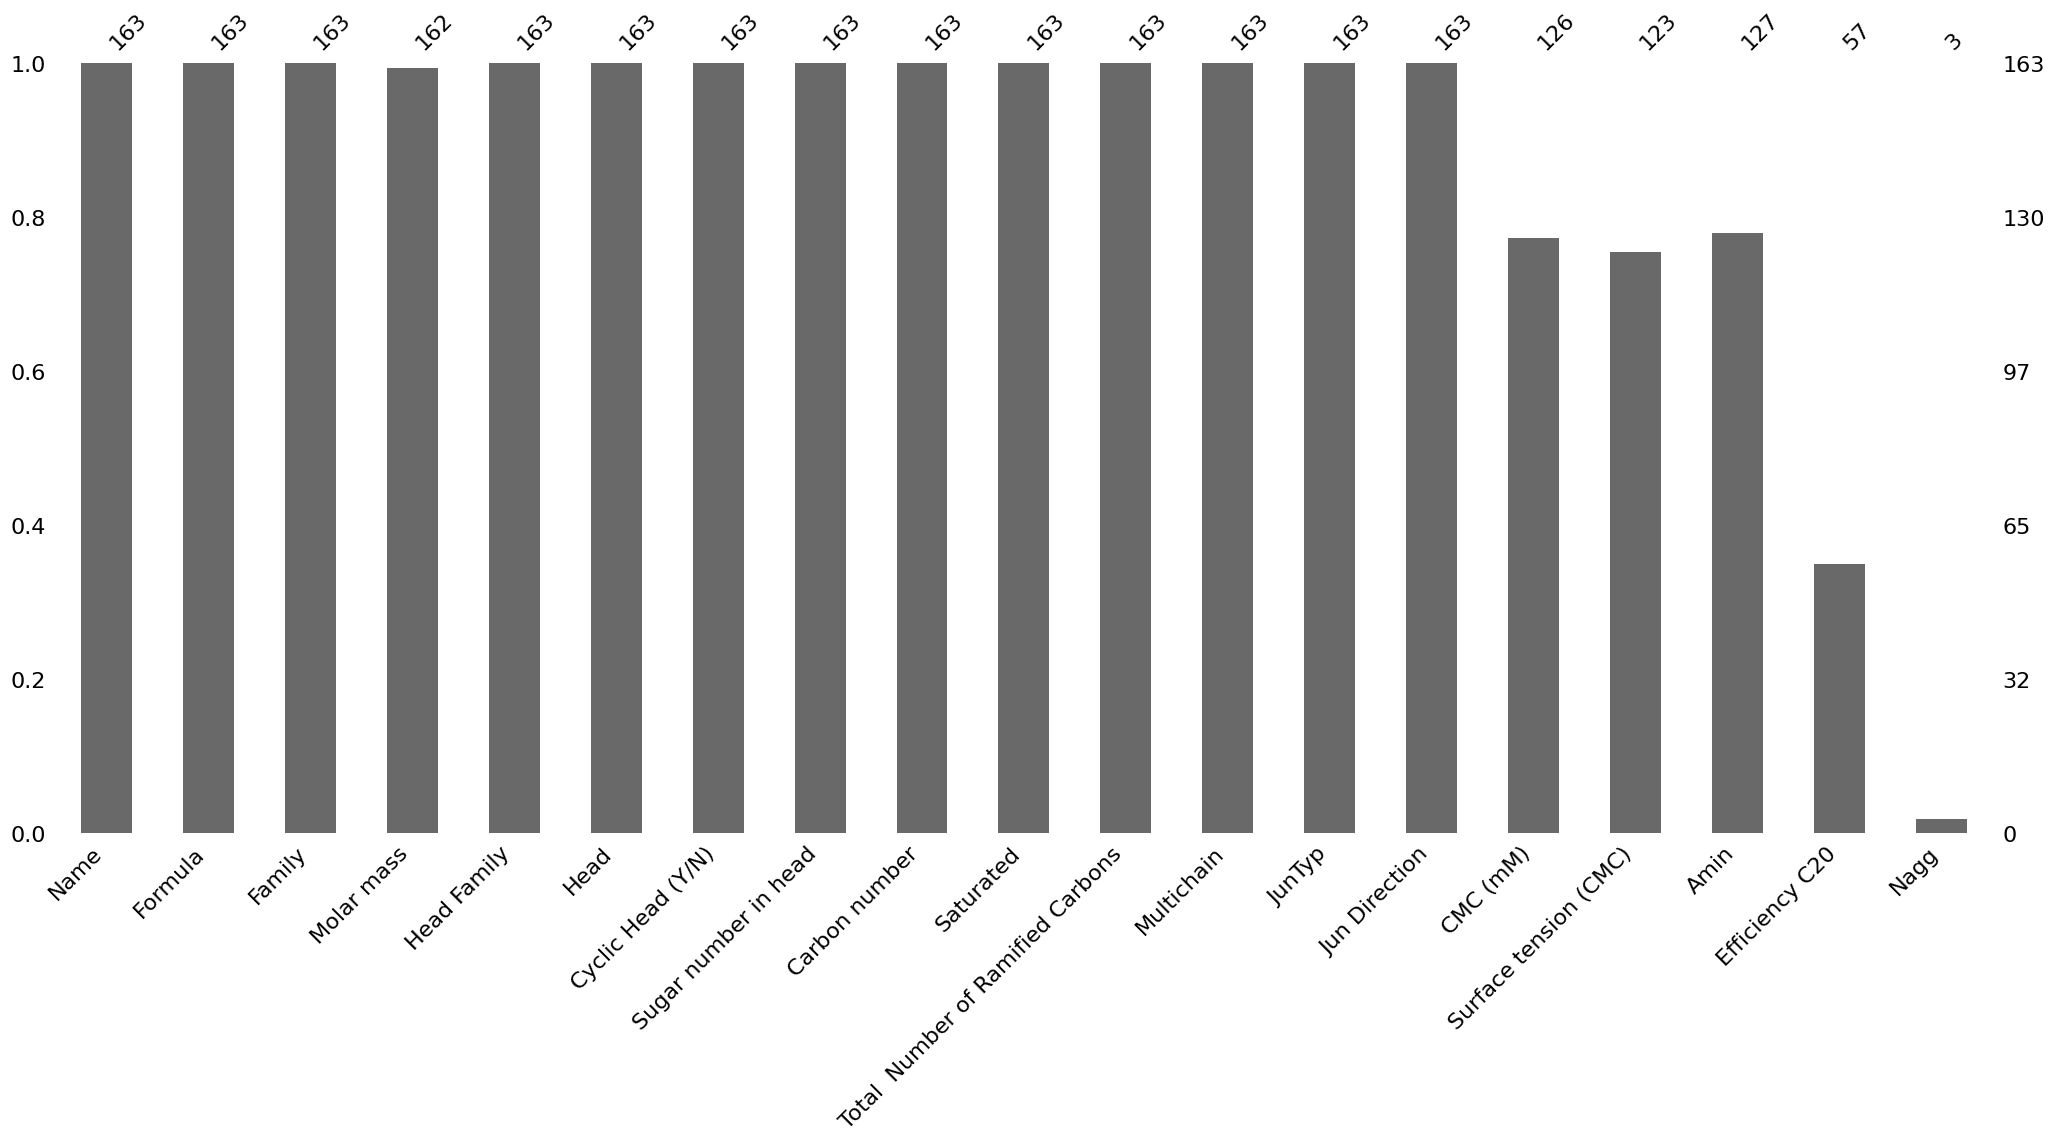

In [20]:
# chechk null values graphically
msno.bar(df_copy) # visual missing values

In [21]:
# Molar mass = Carbon number * (12.011 + 1.008 * number of hydrogens)
df_copy[df_copy["Molar mass"].isnull()]

,Name,Formula,Family,Molar mass,Head Family,Head,Cyclic Head (Y/N),Sugar number in head,Carbon number,Saturated,Total Number of Ramified Carbons,Multichain,JunTyp,Jun Direction,CMC (mM),Surface tension (CMC),Amin,Efficiency C20,Nagg
185,6-O-Octanoyl-D-glucose,C14H26O7,Sugar Esters,NaN,Glucose,Glucose,Y,1.0,7.0,Y,0.0,N,Ester,2.0,"19,1","25,1","37,0",NaN,NaN


In [22]:
# Fill missing values in the "Molar mass" column of the df_copy DataFrame with the molar mass of a
# compound made up of 7 carbon atoms and 26 hydrogen atoms
df_copy["Molar mass"].fillna(7*(12.011 + 1.008 *26),inplace=True)

<ipython-input-22-1af9cd1920d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["Molar mass"].fillna(7*(12.011 + 1.008 *26),inplace=True)


In [23]:
# Check how many missing values there are in the "Molar mass" column of the df_copy DataFrame
# after filling missing values with the molar mass of a compound made up of 7 carbon atoms and 26 hydrogen atoms
df_copy["Molar mass"].isnull().sum()


0

In [24]:
df_copy.loc[185]

Name                                 6-O-Octanoyl-D-glucose
Formula                                            C14H26O7
Family                                         Sugar Esters
Molar mass                                          267.533
Head Family                                         Glucose
Head                                                Glucose
Cyclic Head (Y/N)                                         Y
Sugar number in head                                    1.0
Carbon number                                           7.0
Saturated                                                 Y
Total  Number of Ramified Carbons                       0.0
Multichain                                                N
JunTyp                                                Ester
Jun Direction                                           2.0
CMC (mM)                                               19,1
Surface tension (CMC)                                  25,1
Amin                                    

In [25]:
# Amin = (72.75 * Molar mass) / (Carbon number * (1 + 1.5 * Sugar number in head))
df_copy[df_copy["Amin"].isnull()]

,Name,Formula,Family,Molar mass,Head Family,Head,Cyclic Head (Y/N),Sugar number in head,Carbon number,Saturated,Total Number of Ramified Carbons,Multichain,JunTyp,Jun Direction,CMC (mM),Surface tension (CMC),Amin,Efficiency C20,Nagg
43,N-Decyl-D-Gluconamide,C16H33NO6,Alkylglyconamides,"335,44",Glucose,Acide gluconique,N,1.0,10.0,Y,0.0,N,Amide,1.0,NaN,NaN,NaN,NaN,NaN
45,N-Dodecyl-D-Gluconamide,C18H37NO6,Alkylglyconamides,"363,49",Glucose,Acide gluconique,N,1.0,12.0,Y,0.0,N,Amide,1.0,NaN,NaN,NaN,NaN,NaN
58,N-Dodecyl Dextronamide,C66H117NO46,Alkylglyconamides,"1660,61",Dextran,Acide aldonique du dextran,YN,9.0,12.0,Y,0.0,N,Amide,1.0,"0,33","43,8",NaN,"0,1",NaN
77,N-Tetradecyl-D-Lactobionamide,C26H51NO11,Alkylglyconamides,"553,68",Lactose,Acide lactobionique,YN,2.0,14.0,Y,0.0,N,Amide,1.0,NaN,NaN,NaN,NaN,NaN
80,N-Octadecyl-D-Maltobionamide,C30H59NO11,Alkylglyconamides,"609,79",Maltose,Acide maltobionique,YN,2.0,18.0,Y,0.0,N,Amide,1.0,NaN,NaN,NaN,NaN,NaN
84,N-Tetradecyl-D-Gluconamide,C20H41NO6,Alkylglyconamides,"391,54",Glucose,Acide gluconique,N,1.0,14.0,Y,0.0,N,Amide,1.0,NaN,NaN,NaN,NaN,NaN
96,"1-O-Butyl-D,L-Xylitol",C9H20O5,Itols,"208,25",Xylose,Xylitol,N,1.0,4.0,Y,0.0,N,Ether,0.0,NaN,NaN,NaN,NaN,NaN
109,"1-O-Dodecyl-D,L-Xylitol",C17H36O5,Itols,"320,46",Xylose,Xylitol,N,1.0,12.0,Y,0.0,N,Ether,0.0,NaN,NaN,NaN,NaN,NaN
112,"1-O-Hexadecanoyl-D,L-Xylitol",C21H42O6,Itols,"390,55",Xylose,Xylitol,N,1.0,15.0,Y,0.0,N,Ester,2.0,NaN,NaN,NaN,NaN,NaN
114,"1-O-Hexyl-D,L-Xylitol",C11H24O5,Itols,"236,31",Xylose,Xylitol,N,1.0,6.0,Y,0.0,N,Ester,2.0,NaN,NaN,NaN,NaN,NaN


In [26]:
#Define a function to calculate Amin using the formula provided
def calculate_Amin(row):
  try:
    return (72.75 * float(row['Molar mass'])) / (float(row['Carbon number']) * (1 + 1.5 * float(row['Carbon number'])))
  except:
    return (72.75 * float(row['Molar mass'].replace(",","."))) / (float(row['Carbon number']) * (1 + 1.5 * float(row['Carbon number'])))
    
#Use apply method to calculate Amin for rows where Amin value is null, and assign the result back to Amin column
df_copy.loc[df_copy["Amin"].isnull(), "Amin"] = df_copy[df_copy["Amin"].isnull()].apply(calculate_Amin, axis=1)


In [27]:
df_copy["Amin"].isnull().sum()

0

In [28]:
df_copy["Amin"].unique()

array(['55,0', '53,0', '51', '54,0', '43,0', '57,5', '38,0', '47,0',
       '52,0', '39', '49', '53', '47,4', '43', '54', '45,6', '51,0', '48',
       '44,0', '47', '128', '36', '46,0', '48,0', '52', 152.520375,
       '36,0', 115.98200657894736, '38,9', '30,0', '41,0', '66,0', '50,4',
       '42,0', '40,0', '49,9', 529.8656907894737, '49,4', '45,0', '58,0',
       '50,8', 130.77993506493505, 88.02028273809523, '39,0', '33,8',
       '25,0', 92.4822564935065, '38,1', '21,1', '36,8', '37,3', '39,8',
       '45,4', '45,5', '32,5', 541.078125, '37,0', '32,0', '33,0', '35,0',
       102.2520394736842, 80.60287234042553, 286.52587500000004, '29,0',
       67.60017203107658, 58.40497023809524, '34,0', '49,0',
       380.49105882352944, 82.32087662337662, 145.69096875, 140.262,
       '45,7', '33,2', 138.42960937499998, '33,6', 107.37963815789473,
       106.09375, 240.75279503105588, 71.4114, '66,2', '65,9', '71,3',
       '49,5', 301.11225, '40,3', 164.14741379310345, 60.72459821428571,
   

In [29]:
# CMC (mM) = (5 * Amin) / ((n-1) * Vm)
# Vm = 135.7 - (0.68 * Carbon number)
def calculate_CMC(row):
  Vm=135.7-(0.68*float(row['Carbon number']))
  try:
    return (5 * float(row['Amin'])) / ((float(row['Carbon number']-1)*Vm))
  except:
    return (5 * float(row['Amin'].replace(",","."))) / ((float(row['Carbon number']-1)*Vm))

df_copy.loc[df_copy["CMC (mM)"].isnull(), "CMC (mM)"] = df_copy[df_copy["CMC (mM)"].isnull()].apply(calculate_CMC, axis=1)


In [30]:
df_copy["CMC (mM)"].isnull().sum()

0

In [31]:
df_copy["CMC (mM)"].unique()

array(['15', '8,5', '4,5', '12', '1,94', '0,70', '4', '5,3', '5', '0,85',
       '0,35', '0,25', '2,1', '2,3', '0,05', '0,20', '6,92', '7,5', '6,0',
       '16', '9,4', '0,02', '0,042', '0,8', '0,014', '0,09', '7', '23',
       '75', '110', 0.6573587406258082, '1,3', 0.41335340990686475,
       '0,31', '1,8', '0,7', '83', '3,32', '1,29', '2,31', '0,447',
       '0,33', '0,06', '0,0175', '0,00774', '0,0093', '0,00562',
       '0,00285', '0,0033', '0,4', '0,0322', '0,0538', '0,0676',
       0.3986366700346728, '0,0236', '0,0364', 0.20968992752617005, '5,7',
       '4,0', '3,3', 0.2818996564538648, '0,5', '0,6', 0.2833915818264702,
       '7,9', '50,0', '500', '130', 0.2895728323405122, '11',
       0.17821499857428003, 6.781447398104979, '1,6', '0,99', '0,81',
       '0,13', '0,044', '0,11', '0,077', 0.3644205720618281, '10', '9,2',
       0.2293764153113988, '58', 2.176917451755053, '4,4',
       0.1701712079886534, 0.1391376350475392, '19', '14', '6,7', '120',
       3.594964652527678,

In [32]:
df_copy['Surface tension (CMC)'] = df_copy['Surface tension (CMC)'].str.replace(',', '.').astype(float)

def fill_surface_tension_CMC(row):
  array = [df_copy['Surface tension (CMC)'].mean(), df_copy['Surface tension (CMC)'].median()]
  return array[random.randint(0, 1)]

# Apply the formulas to fill null values in "Surface tension (CMC)" column
df_copy.loc[df_copy["Surface tension (CMC)"].isnull(), "Surface tension (CMC)"] = df_copy[df_copy["Surface tension (CMC)"].isnull()].apply(fill_surface_tension_CMC, axis=1)


<ipython-input-32-8bce91e0fc6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Surface tension (CMC)'] = df_copy['Surface tension (CMC)'].str.replace(',', '.').astype(float)


In [33]:
df_copy["Surface tension (CMC)"].isnull().sum()

0

In [34]:
len(df_copy["Surface tension (CMC)"].unique())

86

In [35]:
df_copy["Surface tension (CMC)"].unique()

array([25.1       , 27.        , 28.        , 26.        , 31.        ,
       34.        , 27.7       , 33.7       , 39.6       , 28.2       ,
       28.5       , 37.3       , 36.9       , 28.4       , 32.4       ,
       30.4       , 25.5       , 30.5       , 30.2       , 37.8       ,
       42.5       , 48.8       , 34.5       , 35.1       , 32.5       ,
       47.4       , 42.2       , 32.43268293, 33.9       , 33.6       ,
       21.5       , 22.1       , 47.        , 32.2       , 40.3       ,
       35.9       , 38.1       , 37.2       , 43.8       , 36.5       ,
       33.5       , 34.8       , 35.7       , 32.3       , 33.8       ,
       50.7       , 35.        , 37.        , 34.2       , 34.9       ,
       31.8       , 20.5       , 24.4       , 24.        , 40.        ,
       35.5       , 41.5       , 29.        , 30.        , 28.1       ,
       24.2       , 29.3       , 36.2       , 30.9       , 33.2       ,
       25.4       , 26.1       , 24.7       , 40.9       , 48.  

In [36]:
def calculate_Efficiency_C20(row):
    # check if Amin is a float, if not replace comma with period and convert to float
    try:
        Amin = float(row['Amin'])
    except:
        Amin = float(row['Amin'].replace(",","."))
    # calculate Efficiency C20 using the provided formula
    return ((float(row['Surface tension (CMC)']) - 26.2) * float(row['CMC (mM)']) * Amin) / (20.0 * float(row['Molar mass']))

# apply the function to fill in missing values for "Efficiency C20" column
# divide the result by 100 as the original formula gives a percentage value
df_copy.loc[df_copy["Efficiency C20"].isnull(), "Efficiency C20"] = df_copy[df_copy["Efficiency C20"].isnull()].apply(calculate_Amin, axis=1)/100


In [37]:
print("number of null values in Efficiency C20 column: ",df_copy["Efficiency C20"].isnull().sum())

number of null values in Efficiency C20 column:  0


In [38]:
len(df_copy["Efficiency C20"].unique())

121

In [39]:
df_copy["Efficiency C20"].unique()

array([1.4569096875, 1.806928125, 2.19414, 2.9313703125, '0,1',
       1.111894407894737, 1.7080919540229882, 2.045184375,
       0.8556208333333334, 1.0896622023809523, '0,6', 1.2723455357142859,
       1.0493602108768034, 1.7025729885057472, 2.0382591346153847, '63,1',
       1.52520375, '0,3', 1.1598200657894737, '0,04', 1.1533746710526316,
       0.7594736249999999, '3,2', '0,8710', '0,2512', '0,5129', '0,0955',
       1.3003743421052634, '0,0035', '0,0008', '0,0010', '0,0011',
       '0,0003', '0,0005', 2.360247836538462, '0,0043', '0,0081',
       '0,0135', 1.3077993506493504, '0,0028', '0,0040',
       0.8802028273809523, '0,8', 2.136121875, 0.924822564935065,
       0.9200749188311689, 1.0608736842105264, 3.01088, 1.933261298076923,
       1.3475118750000001, 1.8768800480769232, 1.573908620689655,
       2.2979962732919255, 0.8649975000000001, 1.3727365384615384,
       5.41078125, 1.5406833333333332, 1.3732747126436784,
       1.2639603896103895, 1.1504703896103896, 1.03701818

In [40]:
def calculate_Nagg(row):
    # Extract carbon number from row
    n = float(row['Carbon number'])
    
    try:
        # Try to extract Amin from row
        Amin = float(row['Amin'])
    except:
        # If it fails, replace any commas with dots and convert to float
        Amin = float(row['Amin'].replace(",","."))
        
    # Calculate Vm using carbon number from row
    Vm = 135.7 - (0.68 * n)
    
    # Extract CMC (mM) from row
    cmc = float(row['CMC (mM)'])
    
    # Calculate Nagg using formula
    nagg = np.exp(((5 * Amin) / (cmc * (n-1) * Vm)))
    
    return nagg


# Apply calculate_Nagg function to rows where "Nagg" column is null
df_copy.loc[df_copy["Nagg"].isnull(), "Nagg"] = df_copy[df_copy["Nagg"].isnull()].apply(calculate_Amin, axis=1)


In [41]:
df_copy["Nagg"].isnull().sum()

0

In [42]:
df_copy["Nagg"].unique()

array([145.69096875, 180.6928125, 219.414, 293.13703125,
       111.1894407894737, 170.80919540229883, 204.5184375,
       85.56208333333333, 108.96622023809523, 88.936875,
       127.23455357142858, 104.93602108768034, 170.25729885057473, '42',
       613.8541071428572, 152.520375, 226.24340625, 115.98200657894736,
       167.71746710526315, 115.33746710526316, 75.9473625, 535.282375,
       285.2022988505747, 158.89509375, 232.61812500000002,
       203.94942857142857, 529.8656907894737, 130.03743421052633,
       122.95472340425532, 78.8646375, 108.35385000000001,
       100.73896781354053, 66.64130952380953, 90.04544642857144,
       236.02478365384619, 66.34973214285714, 89.75386904761905,
       154.97524390243905, 130.77993506493505, 95.7961607142857,
       134.0938392857143, 88.02028273809523, 328.43826923076927,
       213.6121875, 92.4822564935065, 92.00749188311688,
       106.08736842105264, 301.08799999999997, 193.3261298076923,
       134.75118750000001, 187.688004807692

In [43]:
# replace the empty strings (" ") in the "Nagg" column with the calculated values using the "calculate_Amin" function
df_copy.loc[df_copy["Nagg"]==" ", "Nagg"] = df_copy[df_copy["Nagg"]==" "].apply(calculate_Amin, axis=1)

In [44]:
df_copy["Nagg"].unique()

array([145.69096875, 180.6928125, 219.414, 293.13703125,
       111.1894407894737, 170.80919540229883, 204.5184375,
       85.56208333333333, 108.96622023809523, 88.936875,
       127.23455357142858, 104.93602108768034, 170.25729885057473, '42',
       613.8541071428572, 152.520375, 226.24340625, 115.98200657894736,
       167.71746710526315, 115.33746710526316, 75.9473625, 535.282375,
       285.2022988505747, 158.89509375, 232.61812500000002,
       203.94942857142857, 529.8656907894737, 130.03743421052633,
       122.95472340425532, 78.8646375, 108.35385000000001,
       100.73896781354053, 66.64130952380953, 90.04544642857144,
       236.02478365384619, 66.34973214285714, 89.75386904761905,
       154.97524390243905, 130.77993506493505, 95.7961607142857,
       134.0938392857143, 88.02028273809523, 328.43826923076927,
       213.6121875, 92.4822564935065, 92.00749188311688,
       106.08736842105264, 301.08799999999997, 193.3261298076923,
       134.75118750000001, 187.688004807692

In [45]:
# Print the number of missing values in each column of the df_copy DataFrame
print(f"the number of missing values in each column: \n{df_copy.isnull().sum()}")

the number of missing values in each column: 
Name                                 0
Formula                              0
Family                               0
Molar mass                           0
Head Family                          0
Head                                 0
Cyclic Head (Y/N)                    0
Sugar number in head                 0
Carbon number                        0
Saturated                            0
Total  Number of Ramified Carbons    0
Multichain                           0
JunTyp                               0
Jun Direction                        0
CMC (mM)                             0
Surface tension (CMC)                0
Amin                                 0
Efficiency C20                       0
Nagg                                 0
dtype: int64


<Axes: >

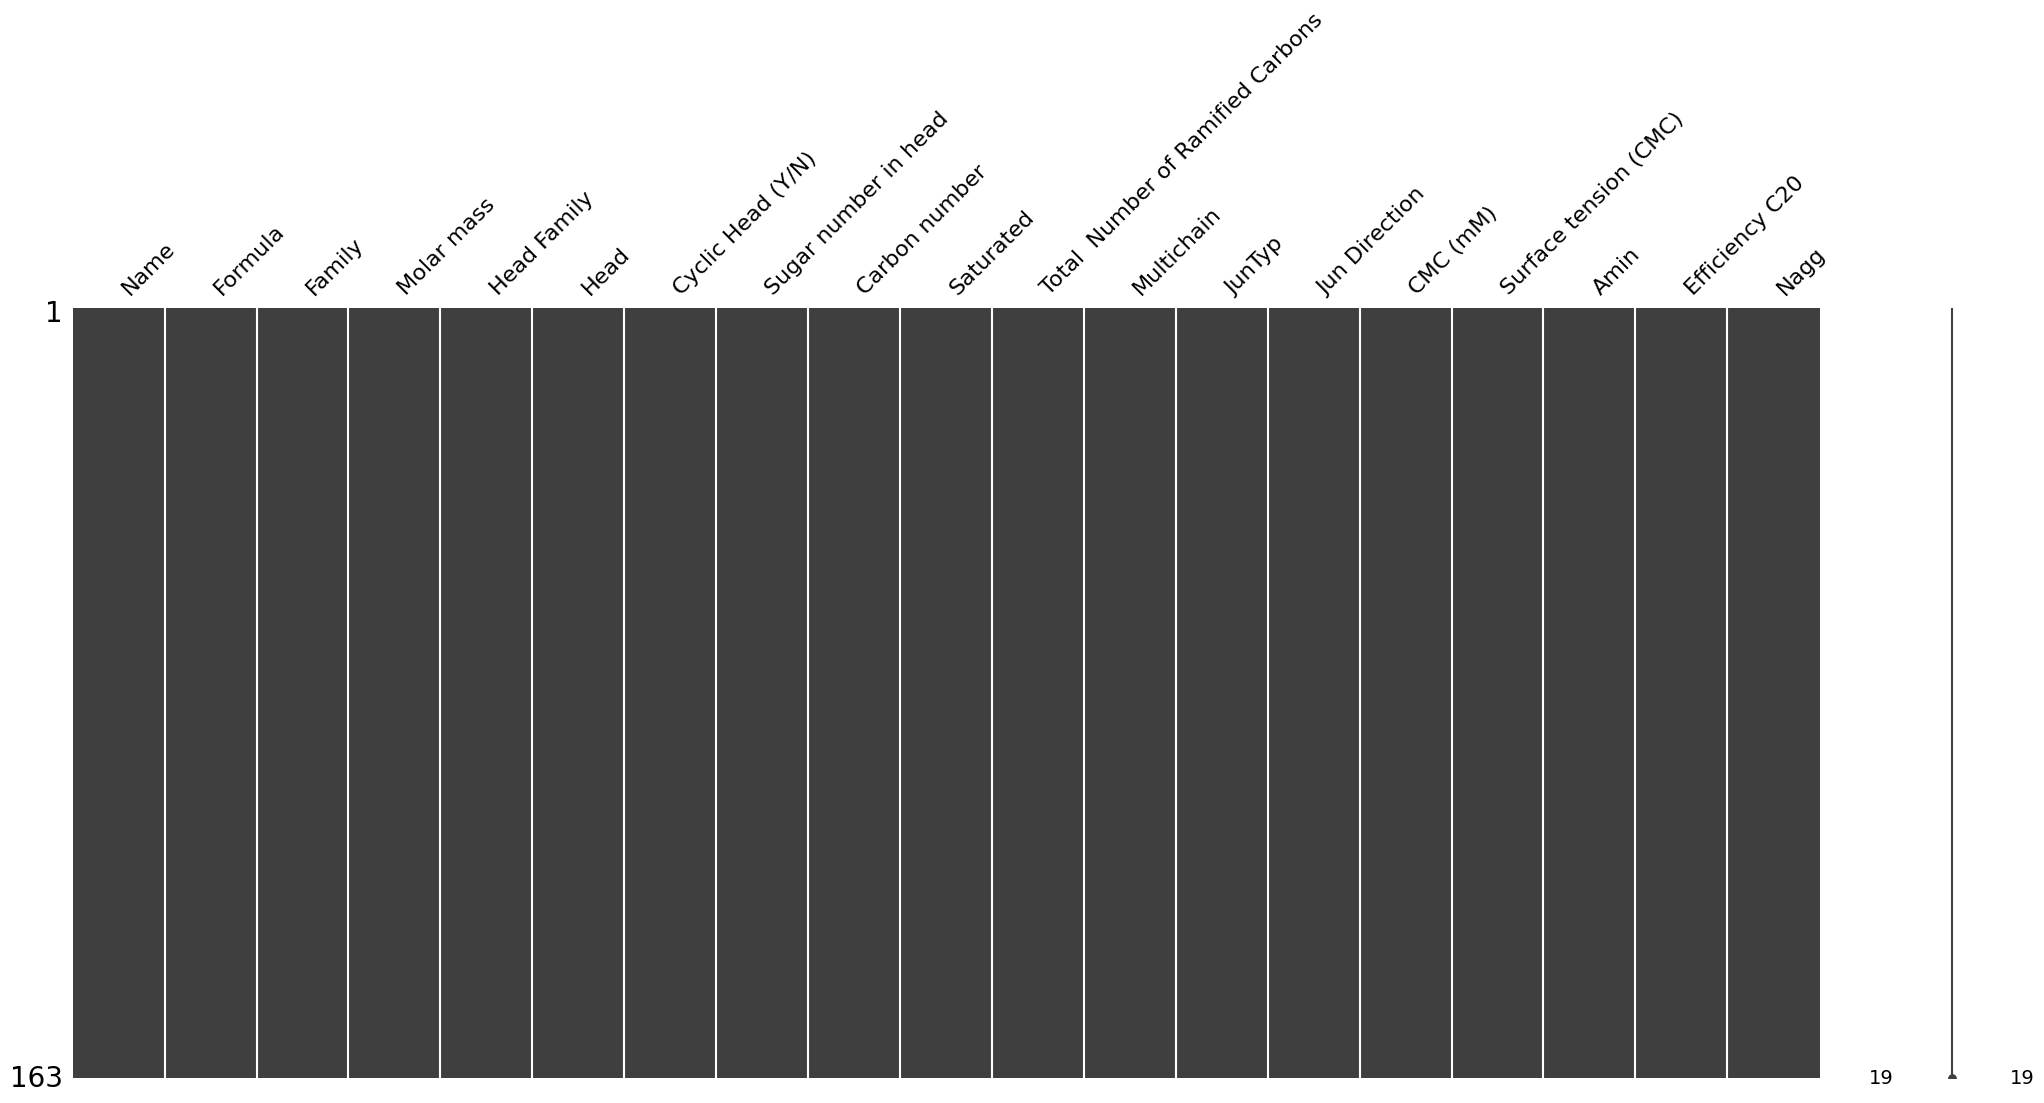

In [46]:
# chechk null values graphically
msno.matrix(df_copy) # visual missing values

In [47]:
df_copy.head()

,Name,Formula,Family,Molar mass,Head Family,Head,Cyclic Head (Y/N),Sugar number in head,Carbon number,Saturated,Total Number of Ramified Carbons,Multichain,JunTyp,Jun Direction,CMC (mM),Surface tension (CMC),Amin,Efficiency C20,Nagg
0,(1-Buty)lhexyl-beta-D-Glucoside,C16H32O6,Alkylglycosides,"320,42",Glucose,Glucose,Y,1.0,10.0,Y,4.0,N,Ether,0.0,15,25.1,"55,0",1.45691,145.690969
1,(1-Ethyl)octyl-beta-D-Glucoside,C16H32O6,Alkylglycosides,"320,42",Glucose,Glucose,Y,1.0,10.0,Y,2.0,N,Ether,0.0,"8,5",27.0,"53,0",1.45691,145.690969
2,(1-Methyl)nonyl-beta-D-Glucoside,C16H32O6,Alkylglycosides,"320,42",Glucose,Glucose,Y,1.0,10.0,Y,1.0,N,Ether,0.0,"4,5",28.0,51,1.45691,145.690969
3,(1-Propyl)heptyl-beta-D-Glucoside,C16H32O6,Alkylglycosides,"320,42",Glucose,Glucose,Y,1.0,10.0,Y,3.0,N,Ether,0.0,12,26.0,"54,0",1.45691,145.690969
4,2’-(E)-7’-octadienyl-alpha-D-Xyloside,C13H22O5,Alkylglycosides,"258,31",Xylose,Xylose,Y,1.0,8.0,N,0.0,N,Ether,0.0,"1,94",31.0,"43,0",1.806928,180.692813


In [48]:
# replace commas with dots and convert the resulting string to float
def replace_comma(series):
  # Convert series to string type
  series = series.astype(str)
  # Replace commas with dots and convert back to float
  series = series.str.replace(',', '.').astype(float)
  return series

# Apply the 'replace_comma' function to the specified columns in the df_copy
df_copy['Molar mass'] = replace_comma(df_copy['Molar mass'])
df_copy['Sugar number in head'] = replace_comma(df_copy['Molar mass'])
df_copy['Carbon number'] = replace_comma(df_copy['Carbon number'])
df_copy['Total  Number of Ramified Carbons'] = replace_comma(df_copy['Total  Number of Ramified Carbons'])
df_copy['Jun Direction'] = replace_comma(df_copy['Jun Direction'])
df_copy['CMC (mM)'] = replace_comma(df_copy['CMC (mM)'])
df_copy['Amin'] =replace_comma(df_copy['Amin'])
df_copy['Efficiency C20'] = replace_comma(df_copy['Efficiency C20'])
df_copy['Nagg'] =replace_comma(df_copy['Nagg'])

<ipython-input-48-f6b6bdebf9d7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Molar mass'] = replace_comma(df_copy['Molar mass'])
<ipython-input-48-f6b6bdebf9d7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Sugar number in head'] = replace_comma(df_copy['Molar mass'])
<ipython-input-48-f6b6bdebf9d7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [49]:
df_copy.head()

,Name,Formula,Family,Molar mass,Head Family,Head,Cyclic Head (Y/N),Sugar number in head,Carbon number,Saturated,Total Number of Ramified Carbons,Multichain,JunTyp,Jun Direction,CMC (mM),Surface tension (CMC),Amin,Efficiency C20,Nagg
0,(1-Buty)lhexyl-beta-D-Glucoside,C16H32O6,Alkylglycosides,320.42,Glucose,Glucose,Y,320.42,10.0,Y,4.0,N,Ether,0.0,15.00,25.1,55.0,1.456910,145.690969
1,(1-Ethyl)octyl-beta-D-Glucoside,C16H32O6,Alkylglycosides,320.42,Glucose,Glucose,Y,320.42,10.0,Y,2.0,N,Ether,0.0,8.50,27.0,53.0,1.456910,145.690969
2,(1-Methyl)nonyl-beta-D-Glucoside,C16H32O6,Alkylglycosides,320.42,Glucose,Glucose,Y,320.42,10.0,Y,1.0,N,Ether,0.0,4.50,28.0,51.0,1.456910,145.690969
3,(1-Propyl)heptyl-beta-D-Glucoside,C16H32O6,Alkylglycosides,320.42,Glucose,Glucose,Y,320.42,10.0,Y,3.0,N,Ether,0.0,12.00,26.0,54.0,1.456910,145.690969
4,2’-(E)-7’-octadienyl-alpha-D-Xyloside,C13H22O5,Alkylglycosides,258.31,Xylose,Xylose,Y,258.31,8.0,N,0.0,N,Ether,0.0,1.94,31.0,43.0,1.806928,180.692813


In [50]:
"""
For each column in df_copy that has numerical data types (int64 and float),
we will detect outliers using the detect_outliers function
and print the results of the IQR method for each column
"""
for i in df_copy.select_dtypes(include=["int64","float"]).columns:
    outliers_per_column = detect_outliers(df_copy[i])
    print(f"{i} outliers from IQR method: ", outliers_per_column)

Molar mass outliers from IQR method:  8
Sugar number in head outliers from IQR method:  8
Carbon number outliers from IQR method:  0
Total  Number of Ramified Carbons outliers from IQR method:  8
Jun Direction outliers from IQR method:  0
CMC (mM) outliers from IQR method:  22
Surface tension (CMC) outliers from IQR method:  8
Amin outliers from IQR method:  24
Efficiency C20 outliers from IQR method:  8
Nagg outliers from IQR method:  11


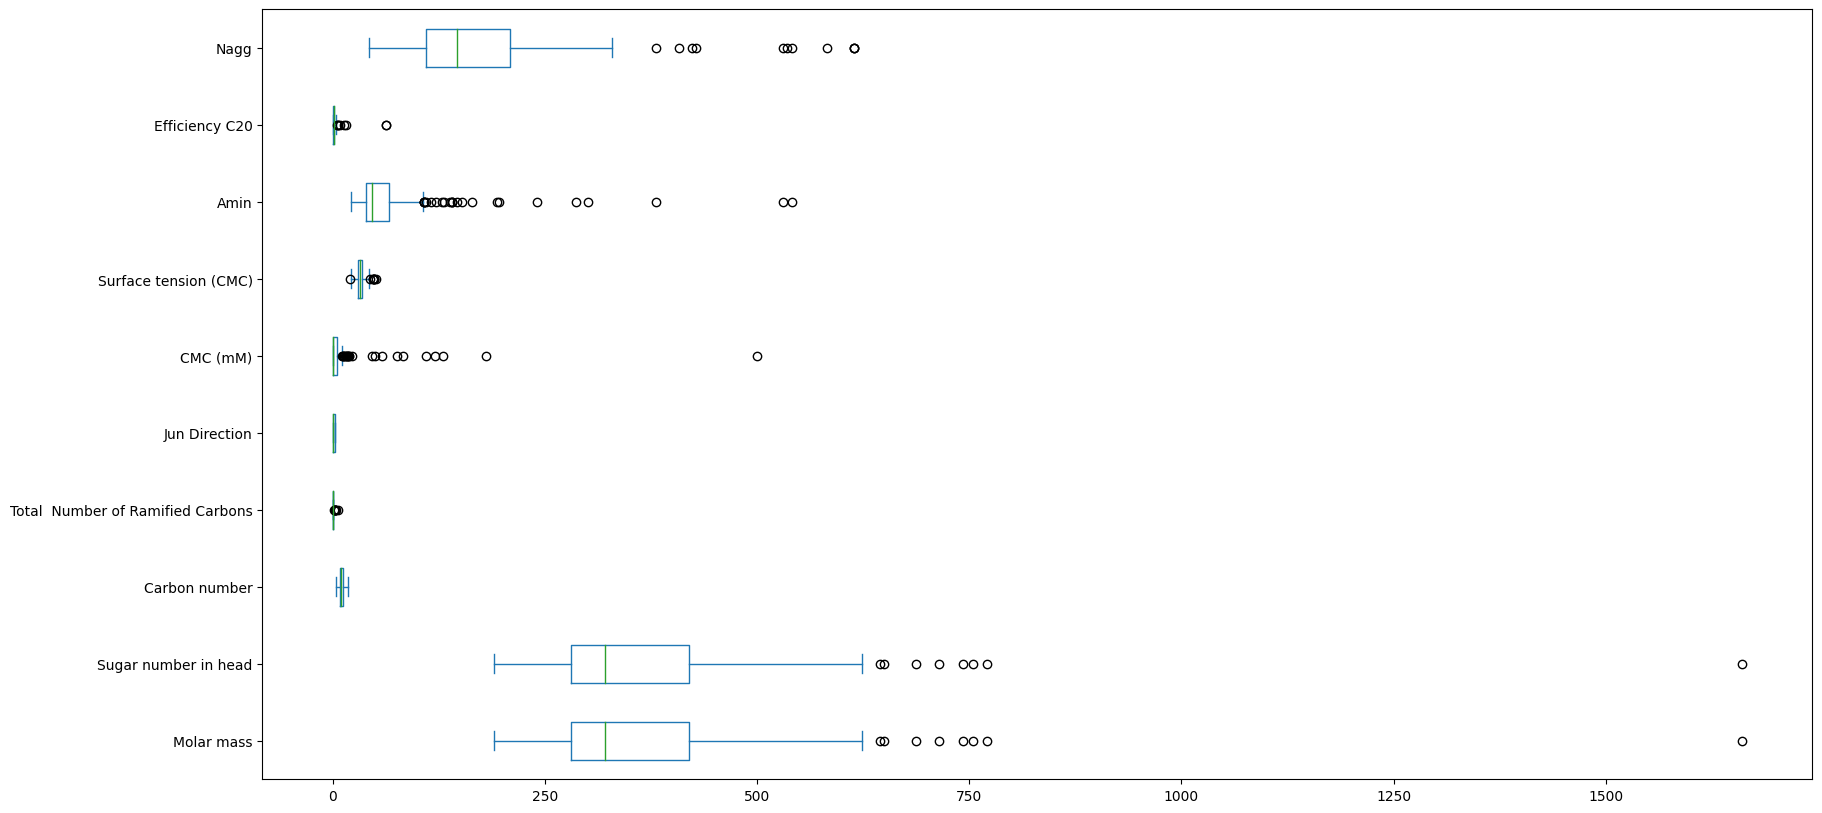

In [51]:
# see visually outliers 
vertical_boxplot(df_copy)

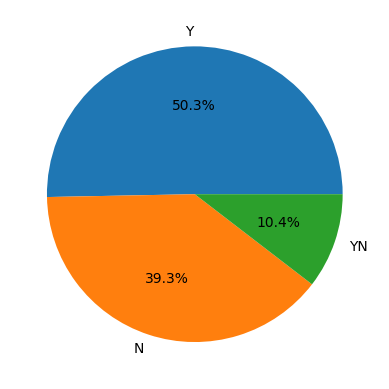

In [52]:
create_pie(df_copy["Cyclic Head (Y/N)"])
# Creates a pie chart of the distribution of values in the "Cyclic Head (Y/N)" column

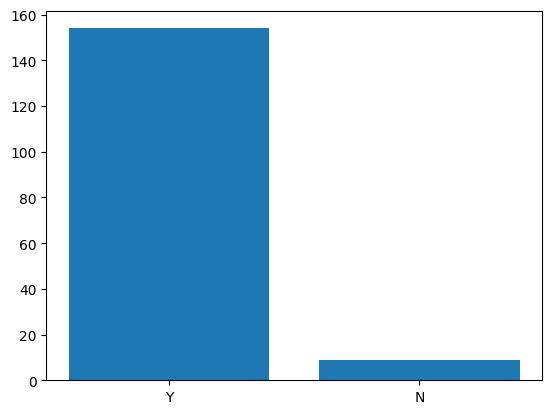

In [53]:
create_barplot(df_copy["Saturated"])

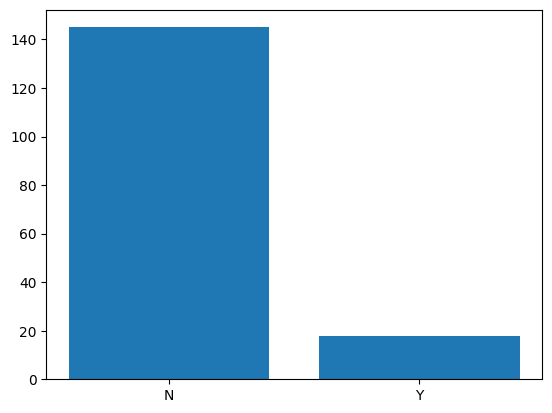

In [54]:
create_barplot(df_copy["Multichain"])

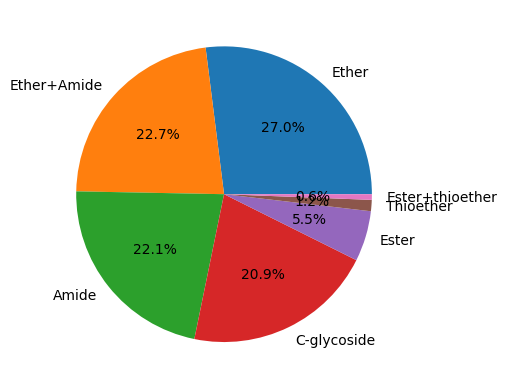

In [55]:
create_pie(df_copy["JunTyp"])

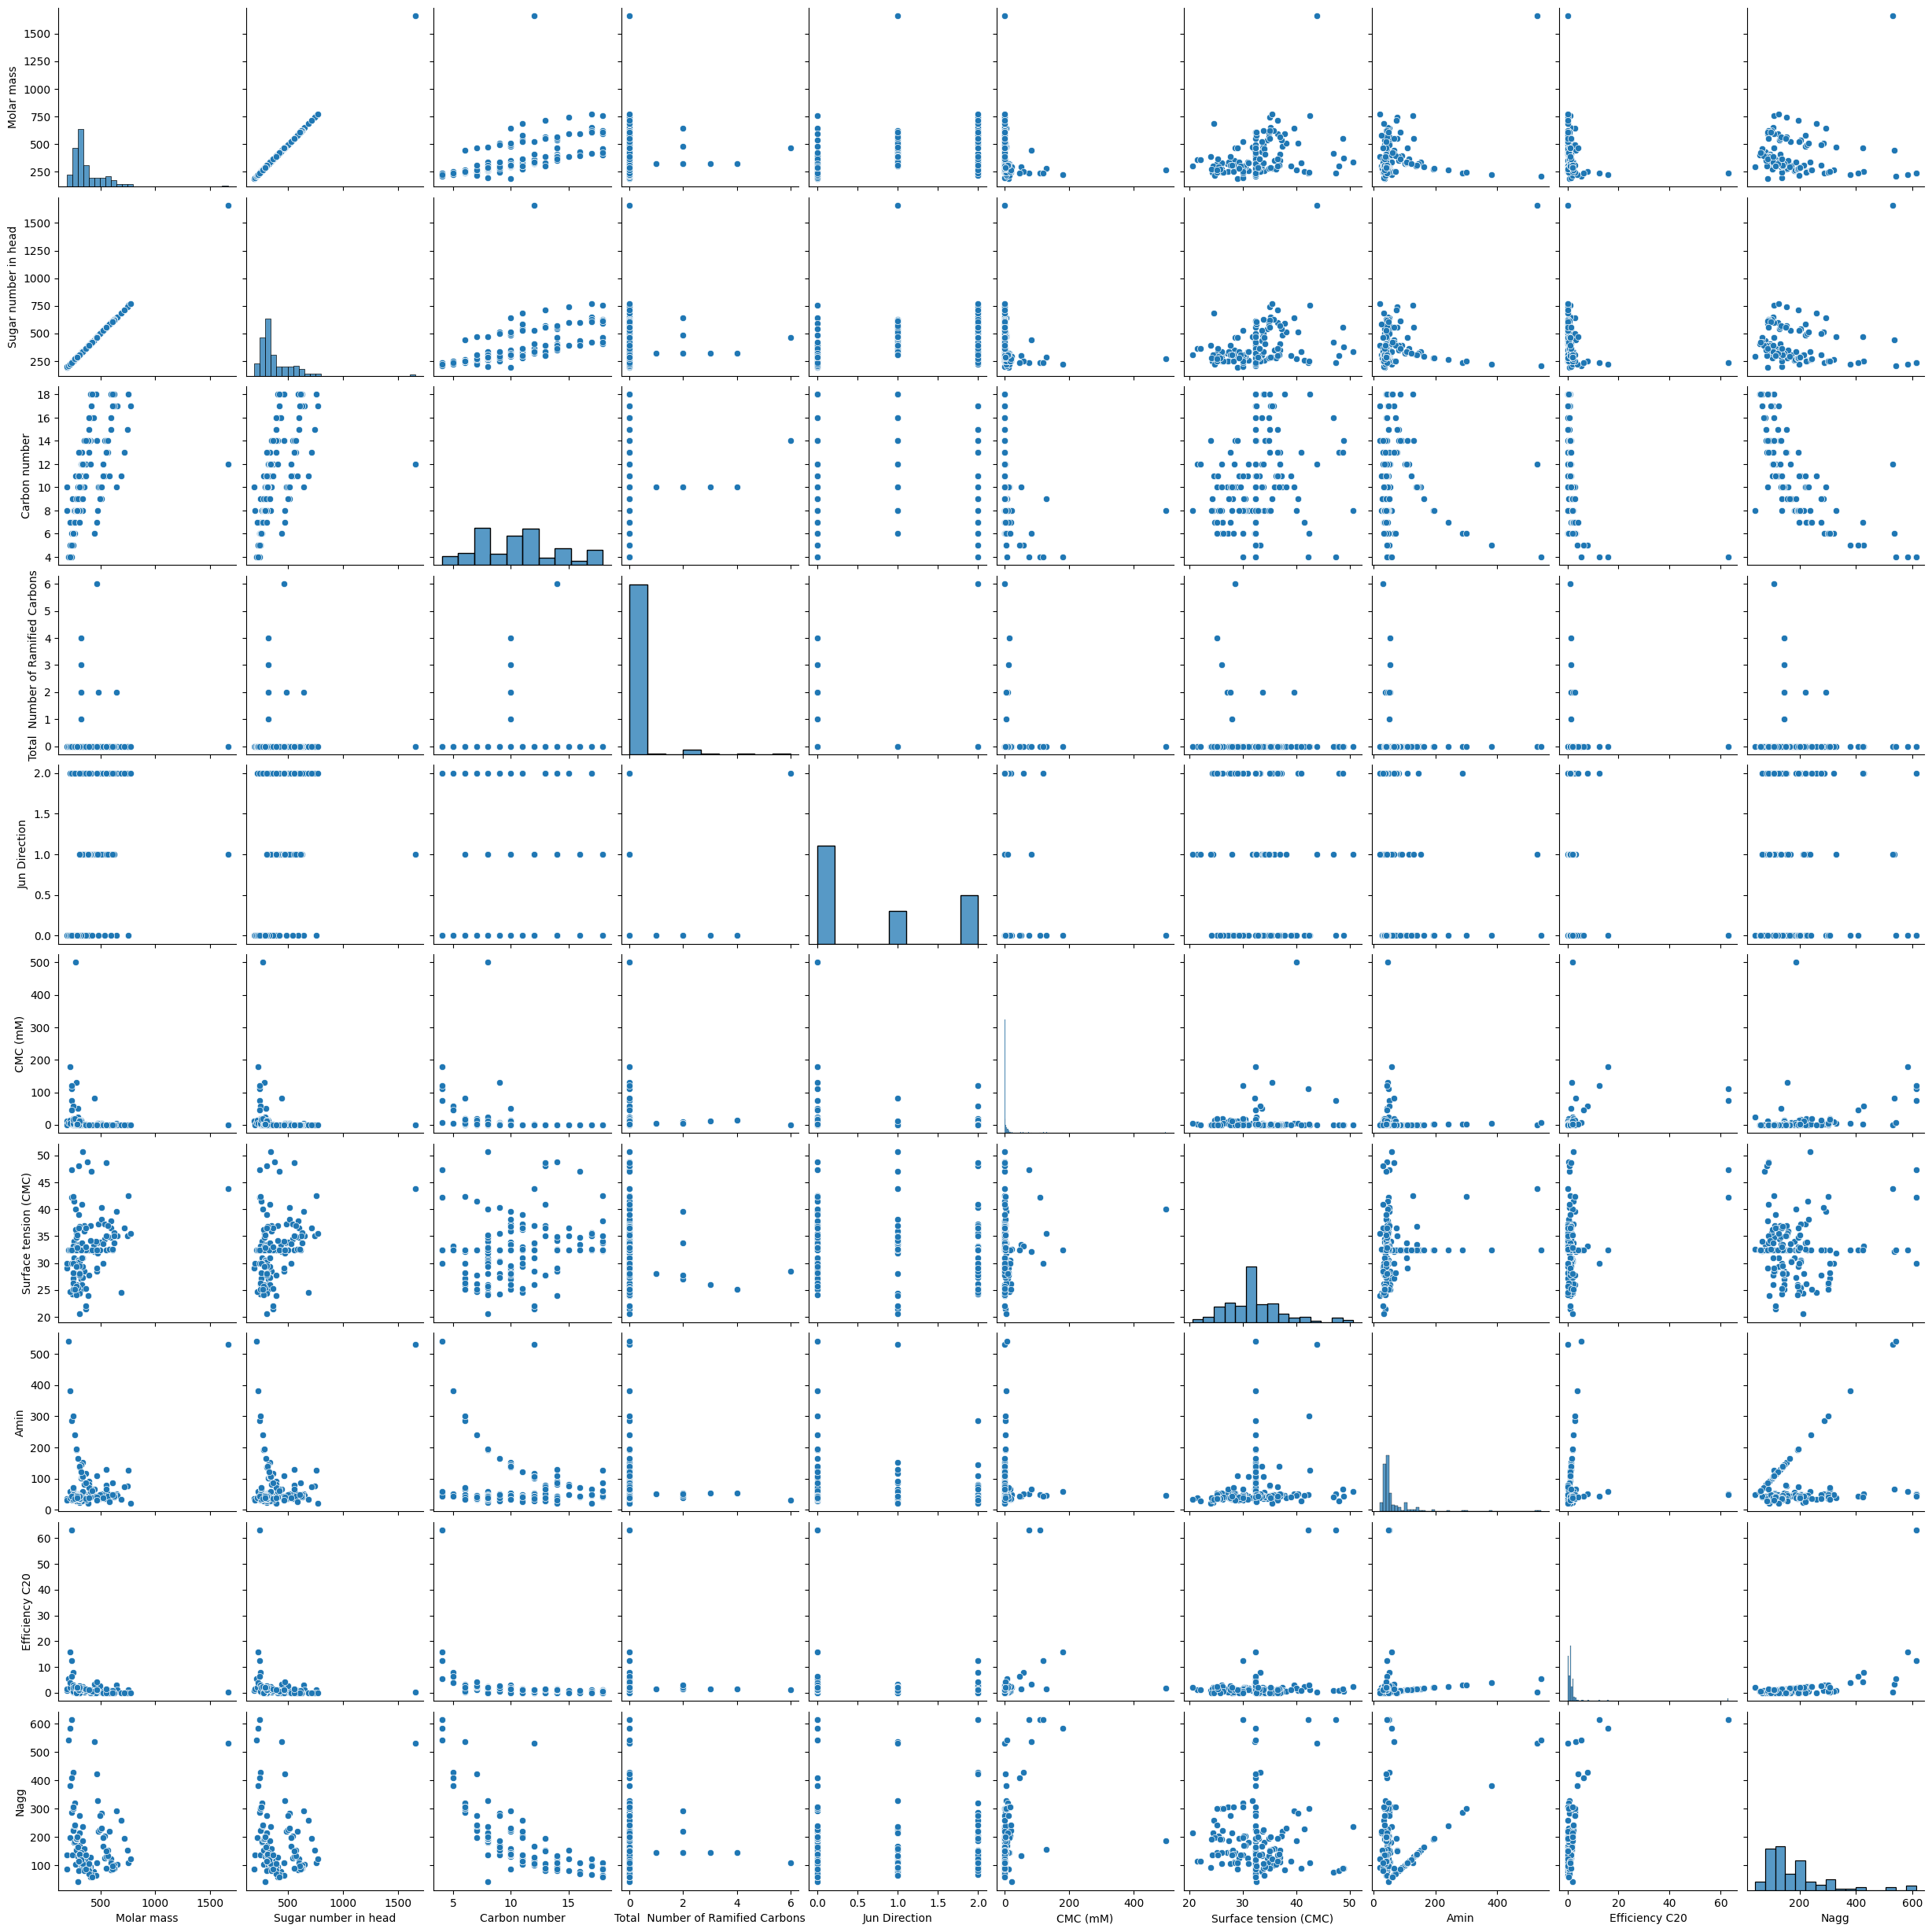

In [56]:
sns.pairplot(df_copy) # show distributions by each column

In [57]:
df_copy["Head Family"].unique()

array(['Glucose', 'Xylose', 'Arabinose', 'Maltose', 'Maltotriose',
       'Mannose', 'Galactose', 'Glucosamine', 'Lactose', 'Dextran',
       'Glucoheptose', 'Glycerol', 'Erythrose', 'Arabinose/Lyxose',
       'Ribose', 'Glucose/Gulose', 'Sucrose', 'Leucrose'], dtype=object)

In [ ]:
df_copy["Head Family"].unique()

array([ 7, 17,  0, 12, 13, 14,  4,  6, 10,  2,  5,  9,  3,  1, 15,  8, 16,
       11])

In [58]:
encoder = LabelEncoder()
for column in df_copy.select_dtypes(exclude=['int', 'float']):
  df_copy[column]=encoder.fit_transform(df_copy[column])

<ipython-input-58-b86ba51abc75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[column]=encoder.fit_transform(df_copy[column])
<ipython-input-58-b86ba51abc75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[column]=encoder.fit_transform(df_copy[column])
<ipython-input-58-b86ba51abc75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [ ]:
df_copy

,Name,Formula,Family,Molar mass,Head Family,Head,Cyclic Head (Y/N),Sugar number in head,Carbon number,Saturated,Total Number of Ramified Carbons,Multichain,JunTyp,Jun Direction,CMC (mM),Surface tension (CMC),Amin,Efficiency C20,Nagg
0,5,42,2,320.42,7,15,1,320.42,10.0,1,4.0,0,4,0.0,15.0000,25.1,55.000000,1.456910,145.690969
1,6,42,2,320.42,7,15,1,320.42,10.0,1,2.0,0,4,0.0,8.5000,27.0,53.000000,1.456910,145.690969
2,7,42,2,320.42,7,15,1,320.42,10.0,1,1.0,0,4,0.0,4.5000,28.0,51.000000,1.456910,145.690969
3,8,42,2,320.42,7,15,1,320.42,10.0,1,3.0,0,4,0.0,12.0000,26.0,54.000000,1.456910,145.690969
4,52,15,2,258.31,17,28,1,258.31,8.0,0,0.0,0,4,0.0,1.9400,31.0,43.000000,1.806928,180.692813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,93,75,11,464.66,14,22,1,464.66,14.0,1,6.0,1,3,2.0,0.0063,28.5,31.000000,1.097533,109.753295
195,94,75,11,464.66,14,22,1,464.66,14.0,1,0.0,1,3,2.0,0.0013,29.0,109.753295,1.097533,109.753295
196,140,23,11,306.35,7,4,1,306.35,8.0,1,0.0,0,2,1.0,10.7000,28.0,44.000000,2.142977,214.297716
197,142,22,11,288.34,7,16,1,288.34,8.0,1,0.0,0,4,0.0,1.3000,32.8,43.000000,2.016994,201.699375


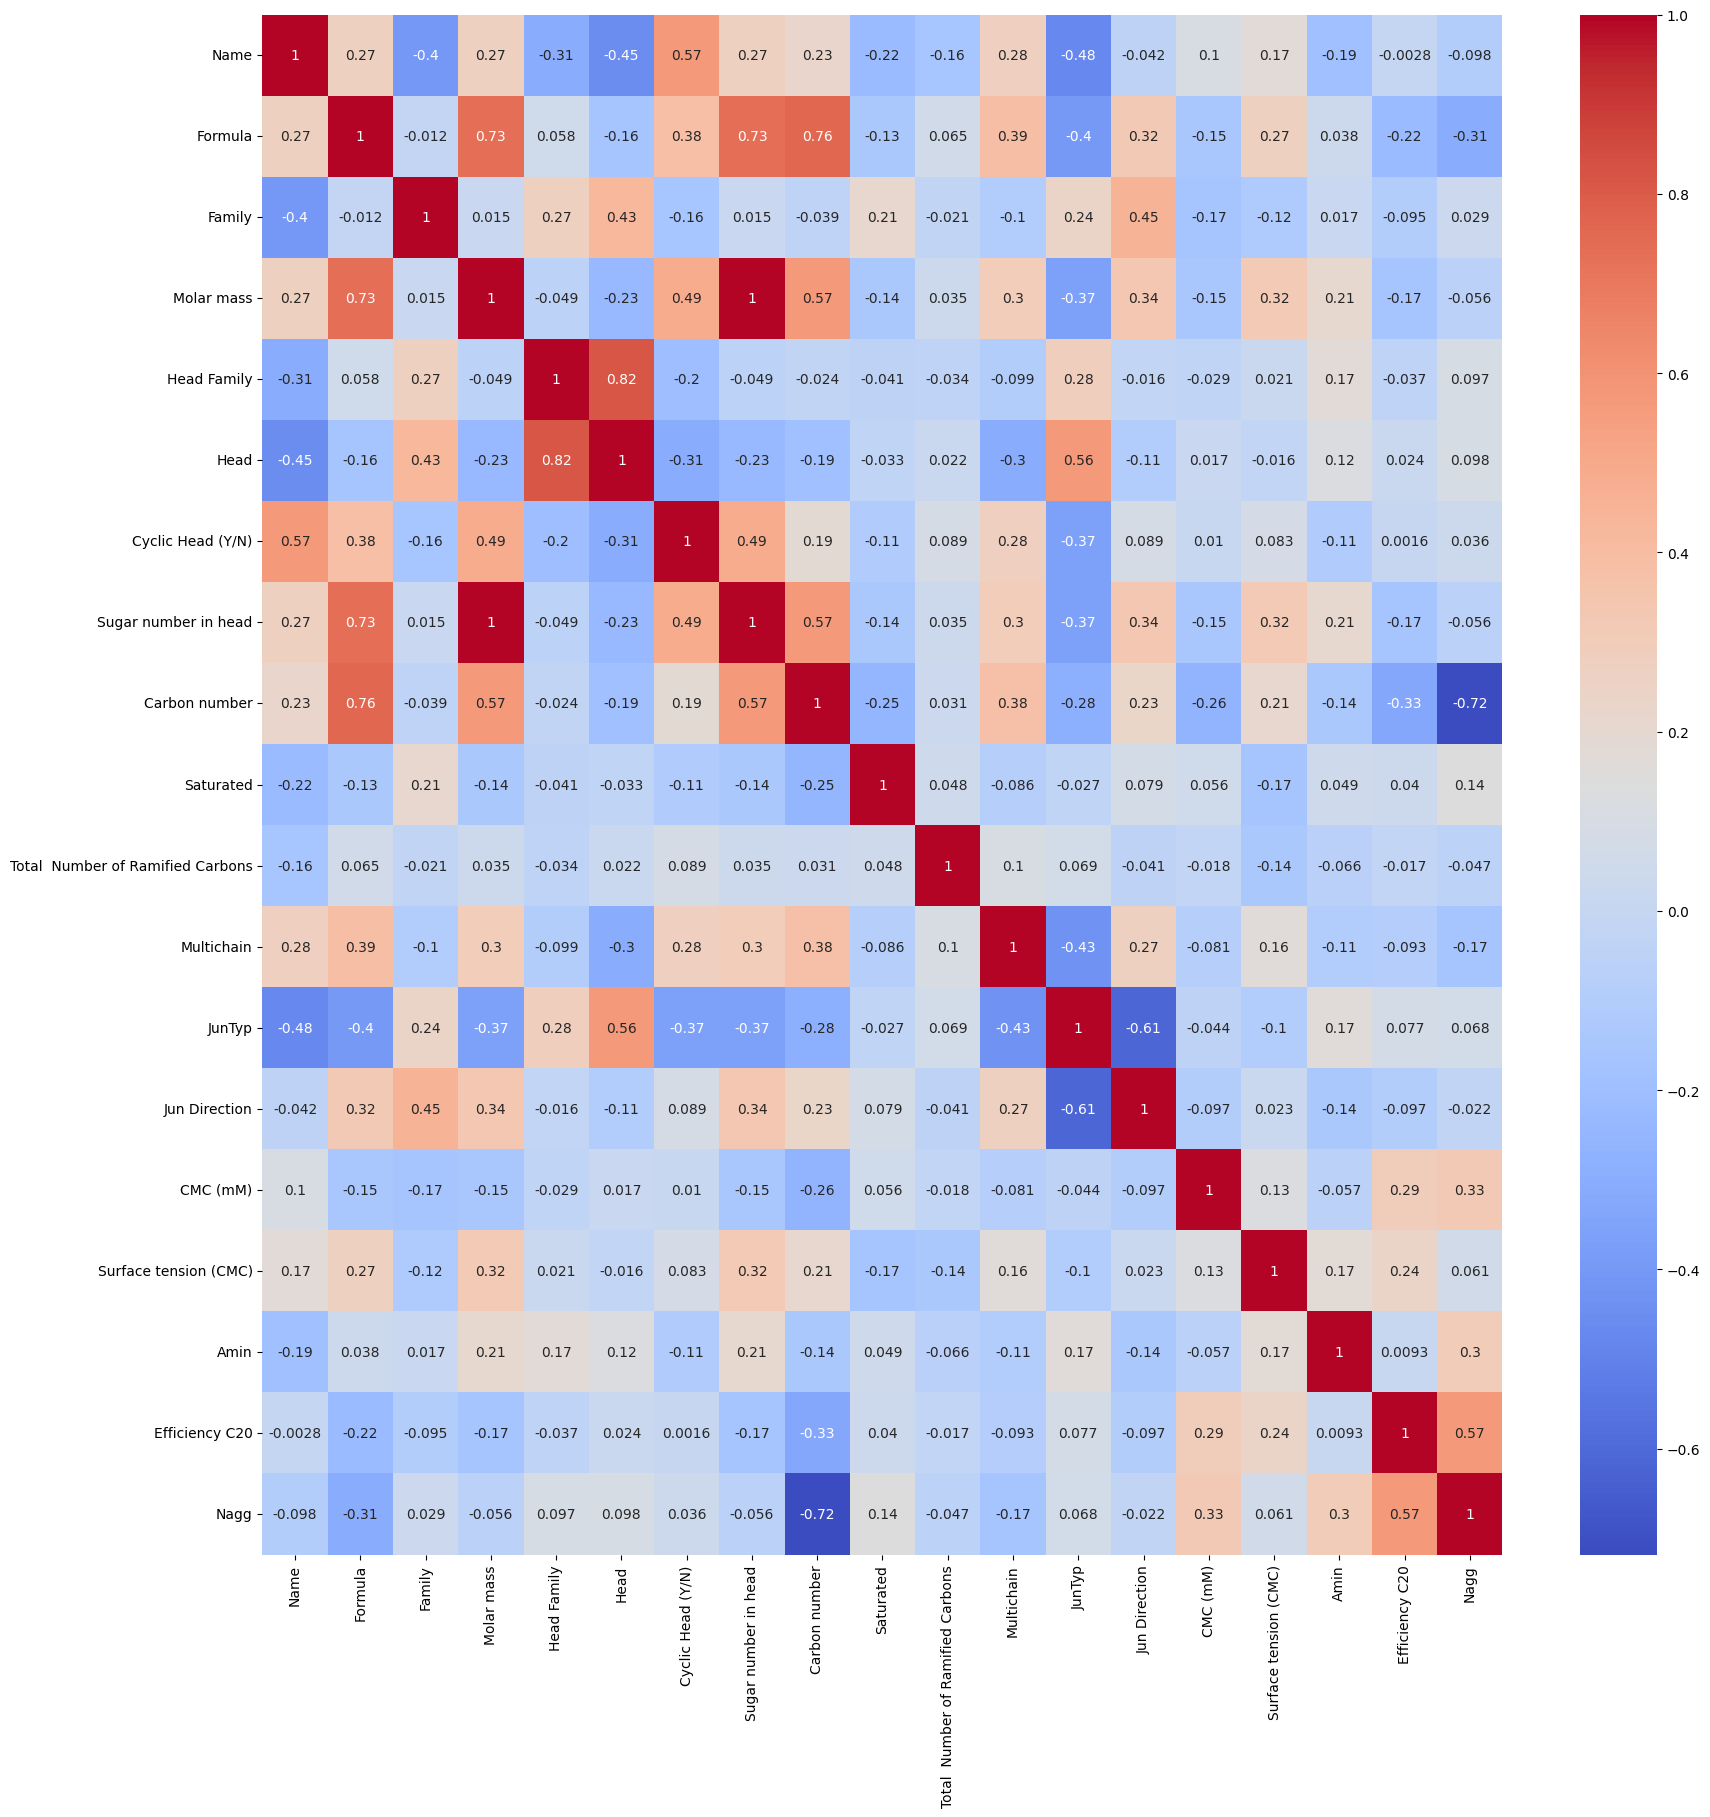

In [61]:
plt.figure(figsize=(20,20))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Drop unnecessary columns
cols_to_drop = ['Name', 'Formula', 'Family',
"Multichain", "Cyclic Head (Y/N)", "Saturated","JunTyp","Head Family"]
scaled = df_copy.drop(cols_to_drop, axis=1)

# Scale the data using RobustScaler
scaler = RobustScaler()
scaled = scaler.fit_transform(scaled)
scaled=pd.DataFrame(scaled, columns = df_copy.drop(cols_to_drop, axis=1).columns)
scaled.set_index(df_copy.index,inplace=True)

# Add back the dropped columns to the scaled data
scaled[cols_to_drop]=df_copy[cols_to_drop]

In [ ]:
scaled

,Molar mass,Head,Sugar number in head,Carbon number,Total Number of Ramified Carbons,Jun Direction,CMC (mM),Surface tension (CMC),Amin,Efficiency C20,Nagg,Name,Formula,Family,Multichain,Cyclic Head (Y/N),Saturated,JunTyp,Head Family
0,0.000000,-0.200000,0.000000,0.0,4.0,0.0,3.343324,-1.292035,0.331492,0.234893,0.000000,5,42,2,0,1,1,4,7
1,0.000000,-0.200000,0.000000,0.0,2.0,0.0,1.834538,-0.955752,0.257827,0.234893,0.000000,6,42,2,0,1,1,4,7
2,0.000000,-0.200000,0.000000,0.0,1.0,0.0,0.906054,-0.778761,0.184162,0.234893,0.000000,7,42,2,0,1,1,4,7
3,0.000000,-0.200000,0.000000,0.0,3.0,0.0,2.646961,-1.132743,0.294659,0.234893,0.000000,8,42,2,0,1,1,4,7
4,-0.446096,0.666667,-0.446096,-0.5,0.0,0.0,0.311825,-0.247788,-0.110497,0.496701,0.351052,52,15,2,0,1,0,4,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,1.035984,0.266667,1.035984,1.0,6.0,1.0,-0.137027,-0.690265,-0.552486,-0.033914,-0.360438,93,75,11,1,1,1,3,14
195,1.035984,0.266667,1.035984,1.0,0.0,1.0,-0.138188,-0.601770,2.348188,-0.033914,-0.360438,94,75,11,1,1,1,3,14
196,-0.101056,-0.933333,-0.101056,-0.5,0.0,0.5,2.345204,-0.778761,-0.073665,0.748060,0.688094,140,23,11,0,1,1,2,7
197,-0.230410,-0.133333,-0.230410,-0.5,0.0,0.0,0.163267,0.070796,-0.110497,0.653827,0.561738,142,22,11,0,1,1,4,7


In [ ]:
scaled.isnull().sum()

Molar mass                           0
Head                                 0
Sugar number in head                 0
Carbon number                        0
Total  Number of Ramified Carbons    0
Jun Direction                        0
CMC (mM)                             0
Surface tension (CMC)                0
Amin                                 0
Efficiency C20                       0
Nagg                                 0
Name                                 0
Formula                              0
Family                               0
Multichain                           0
Cyclic Head (Y/N)                    0
Saturated                            0
JunTyp                               0
Head Family                          0
dtype: int64

In [ ]:
# Selecting independent variables and target variable
X=scaled[["CMC (mM)","Surface tension (CMC)","Amin"]]
y=scaled["Head Family"].astype(str)

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#here it is obviously there is inbalance problem
y.value_counts()

17    42
7     37
12    13
10    11
14     9
15     9
4      7
13     6
0      5
9      5
1      5
3      4
16     3
6      2
5      2
2      1
8      1
11     1
Name: Head Family, dtype: int64

In [ ]:
# using over sampling

oversample = RandomOverSampler(random_state=42)
X_balanced, y_balanced = oversample.fit_resample(X, y)
x_train ,x_test ,y_train,y_test = train_test_split(X_balanced, y_balanced,test_size=.3,random_state=42)

In [ ]:
y_balanced.value_counts()

7     42
17    42
16    42
8     42
15    42
1     42
3     42
9     42
5     42
2     42
10    42
6     42
4     42
14    42
13    42
12    42
0     42
11    42
Name: Head Family, dtype: int64

In [ ]:
des_tree_c=DecisionTreeClassifier(criterion='entropy', max_depth=17)
des_tree_c.fit(x_train, y_train)

y_pred_tr=des_tree_c.predict(x_train)
print(f'Accuracy (train): {accuracy_score(y_train, y_pred_tr)}')

y_pred_ts=des_tree_c.predict(x_test)
print(f'Accuracy (test): {accuracy_score(y_test, y_pred_ts)}')

Accuracy (train): 0.996219281663516
Accuracy (test): 0.8854625550660793


In [ ]:
print(classification_report(y_train,y_pred_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.96      1.00      0.98        27
          10       1.00      1.00      1.00        28
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        28
          13       1.00      1.00      1.00        27
          14       1.00      1.00      1.00        33
          15       0.96      1.00      0.98        26
          16       1.00      1.00      1.00        27
          17       1.00      0.93      0.96        28
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        31
           9       1.00    

In [ ]:
print(classification_report(y_test,y_pred_ts))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      1.00      1.00        15
          10       0.92      0.86      0.89        14
          11       0.92      1.00      0.96        11
          12       0.74      1.00      0.85        14
          13       1.00      1.00      1.00        15
          14       0.69      1.00      0.82         9
          15       0.94      1.00      0.97        16
          16       0.94      1.00      0.97        15
          17       1.00      0.29      0.44        14
           2       1.00      1.00      1.00        13
           3       0.90      1.00      0.95         9
           4       0.82      0.82      0.82        11
           5       0.89      1.00      0.94        17
           6       0.88      1.00      0.93         7
           7       0.60      0.33      0.43        18
           8       1.00      1.00      1.00        11
           9       0.82    

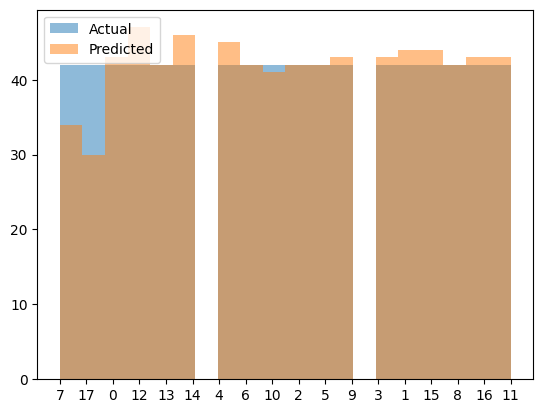

In [ ]:
# plot histogram of actual values
plt.hist(y_balanced, bins=20, alpha=0.5, label='Actual')

# plot histogram of predicted values
plt.hist(des_tree_c.predict(X_balanced), bins=20, alpha=0.5, label='Predicted')

plt.legend()
plt.show()

In [ ]:
# Define the hyperparameter grid to search over for DecisionTreeClassifier
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create the grid search object
grid_search = GridSearchCV(des_tree_c, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Print the best score
print("Best hyperparameters: ", grid_search.best_score_)

# Use the best hyperparameters to predict on the balanced set
y_pred = grid_search.predict(X_balanced)


Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best hyperparameters:  0.9187241689128482


In [ ]:
for i in range(10):
  print(y_balanced[i],">>",y_pred[i])

7 >> 7
7 >> 7
7 >> 4
7 >> 7
17 >> 17
0 >> 0
7 >> 7
12 >> 12
13 >> 13
7 >> 7


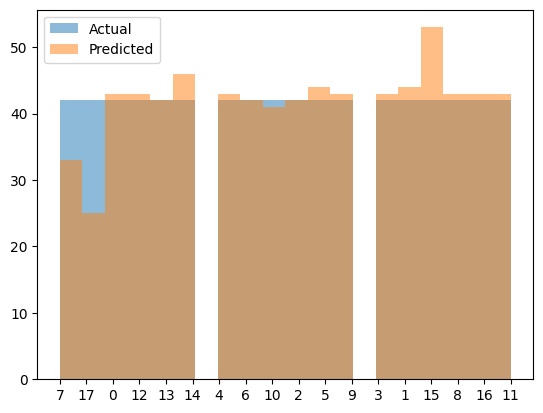

In [ ]:
# plot histogram of actual values
plt.hist(y_balanced, bins=20, alpha=0.5, label='Actual')

# plot histogram of predicted values
plt.hist(y_pred, bins=20, alpha=0.5, label='Predicted')

plt.legend()
plt.show()

In [ ]:
# create the Random Forest classifier model
rand_for_clf=RandomForestClassifier(n_estimators=300)
rand_for_clf.fit(x_train, y_train)

y_pred_train=rand_for_clf.predict(x_train)
y_pred_test=rand_for_clf.predict(x_test)

print('Train: ',accuracy_score(y_train, y_pred_train))
print('Test: ', accuracy_score(y_test, y_pred_test))

Train:  0.996219281663516
Test:  0.8810572687224669


In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.96      1.00      0.98        27
          10       1.00      1.00      1.00        28
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        28
          13       1.00      1.00      1.00        27
          14       1.00      1.00      1.00        33
          15       0.96      1.00      0.98        26
          16       1.00      1.00      1.00        27
          17       1.00      0.93      0.96        28
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        31
           9       1.00    

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.88      1.00      0.94        15
          10       0.92      0.86      0.89        14
          11       1.00      1.00      1.00        11
          12       0.78      1.00      0.88        14
          13       1.00      1.00      1.00        15
          14       0.69      1.00      0.82         9
          15       0.89      1.00      0.94        16
          16       1.00      1.00      1.00        15
          17       0.43      0.21      0.29        14
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         9
           4       0.90      0.82      0.86        11
           5       0.94      1.00      0.97        17
           6       0.88      1.00      0.93         7
           7       0.55      0.33      0.41        18
           8       1.00      1.00      1.00        11
           9       0.82    

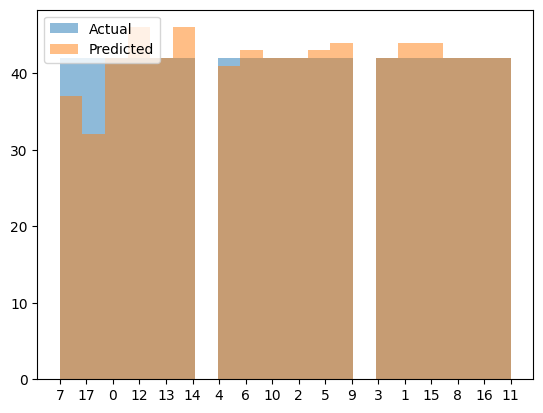

In [ ]:
# plot histogram of actual values
plt.hist(y_balanced, bins=20, alpha=0.5, label='Actual')

# plot histogram of predicted values
plt.hist(rand_for_clf.predict(X_balanced), bins=20, alpha=0.5, label='Predicted')

plt.legend()
plt.show()

In [ ]:
# define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# perform the hyperparameter tuning using GridSearchCV
rf_grid_search = GridSearchCV(estimator=rand_for_clf, param_grid=param_grid, cv=5)
rf_grid_search.fit(x_train, y_train)

# print the best hyperparameters and corresponding score
print("Best hyperparameters:", rf_grid_search.best_params_)
print("Best score:", rf_grid_search.best_score_)


Best hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9168194070080862


In [ ]:
# Use the best hyperparameters to predict on the balanced set
y_pred_rf = rf_grid_search.predict(X_balanced)

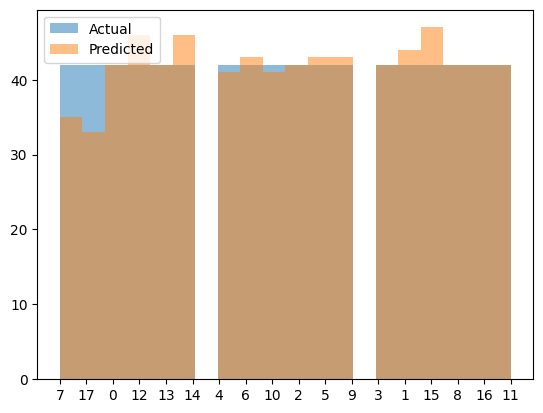

In [ ]:
# plot histogram of actual values
plt.hist(y_balanced, bins=20, alpha=0.5, label='Actual')

# plot histogram of predicted values
plt.hist(y_pred_rf, bins=20, alpha=0.5, label='Predicted')

plt.legend()
plt.show()

In [ ]:
svm_clf = SVC(C=200 ,kernel='rbf',gamma='auto')
svm_clf.fit(x_train, y_train)
y_pred_train = svm_clf.predict(x_train)
y_pred_test = svm_clf.predict(x_test)
print('Train: ',accuracy_score(y_train, y_pred_train))
print('Test: ', accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Train:  0.9319470699432892
Test:  0.8061674008810573
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.88      1.00      0.94        15
          10       0.55      0.86      0.67        14
          11       1.00      1.00      1.00        11
          12       0.64      0.64      0.64        14
          13       0.94      1.00      0.97        15
          14       0.64      1.00      0.78         9
          15       0.71      0.62      0.67        16
          16       0.83      1.00      0.91        15
          17       0.29      0.14      0.19        14
           2       1.00      1.00      1.00        13
           3       0.90      1.00      0.95         9
           4       0.90      0.82      0.86        11
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00         7
           7       0.17      0.06      0.08        18
           8       1.00     

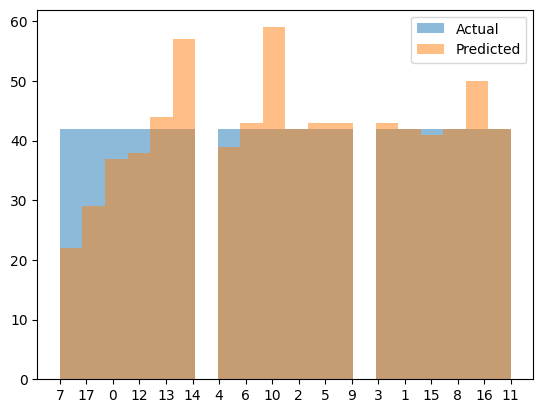

In [ ]:
# plot histogram of actual values
plt.hist(y_balanced, bins=20, alpha=0.5, label='Actual')

# plot histogram of predicted values
plt.hist(svm_clf.predict(X_balanced), bins=20, alpha=0.5, label='Predicted')

plt.legend()
plt.show()

In [ ]:
# Define the hyperparameters to tune
parameters = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Perform a grid search over the hyperparameters
svm_grid_search = GridSearchCV(svm_clf, parameters, cv=5, n_jobs=-1)

# Fit the grid search to the training data
svm_grid_search.fit(x_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", svm_grid_search.best_params_)

# Use the best hyperparameters to fit the model to the training data
svm_best_model = svm_grid_search.best_estimator_
svm_best_model.fit(x_train, y_train)

# Evaluate the model on the testing data
accuracy = svm_best_model.score(x_test, y_test)
print("Accuracy on testing data: ", accuracy)


Best hyperparameters:  {'C': 100, 'kernel': 'rbf'}
Accuracy on testing data:  0.8061674008810573


In [ ]:
print("the best score: ", svm_grid_search.best_score_)

the best score:  0.850691823899371


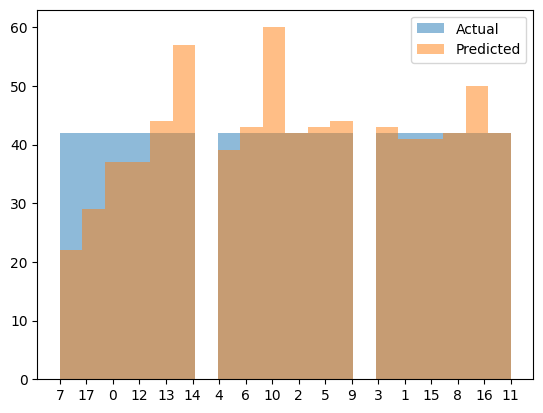

In [ ]:
# plot histogram of actual values
plt.hist(y_balanced, bins=20, alpha=0.5, label='Actual')

# plot histogram of predicted values
plt.hist(svm_grid_search.predict(X_balanced), bins=20, alpha=0.5, label='Predicted')

plt.legend()
plt.show()

In [ ]:
# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(x_train, y_train)

# Predict the classes of the test data
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_train, y_pred_train)
print("train accuracy:", accuracy)

accuracy = accuracy_score(y_test, y_pred_test)
print("test accuracy:", accuracy)

train accuracy: 0.888468809073724
test accuracy: 0.7312775330396476


In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       0.76      0.93      0.83        27
          10       0.84      0.93      0.88        28
          11       1.00      1.00      1.00        31
          12       0.84      0.75      0.79        28
          13       0.96      0.96      0.96        27
          14       0.89      1.00      0.94        33
          15       0.74      0.77      0.75        26
          16       0.84      1.00      0.92        27
          17       0.89      0.29      0.43        28
           2       0.97      1.00      0.98        29
           3       0.82      1.00      0.90        33
           4       0.97      0.94      0.95        31
           5       0.96      1.00      0.98        25
           6       0.90      1.00      0.95        35
           7       1.00      0.21      0.34        24
           8       1.00      1.00      1.00        31
           9       0.82    

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.41      0.73      0.52        15
          10       0.82      0.64      0.72        14
          11       1.00      1.00      1.00        11
          12       0.71      0.71      0.71        14
          13       0.92      0.80      0.86        15
          14       0.60      1.00      0.75         9
          15       0.40      0.25      0.31        16
          16       0.79      1.00      0.88        15
          17       0.33      0.07      0.12        14
           2       1.00      1.00      1.00        13
           3       0.69      1.00      0.82         9
           4       0.90      0.82      0.86        11
           5       1.00      1.00      1.00        17
           6       0.88      1.00      0.93         7
           7       0.00      0.00      0.00        18
           8       1.00      1.00      1.00        11
           9       0.47    

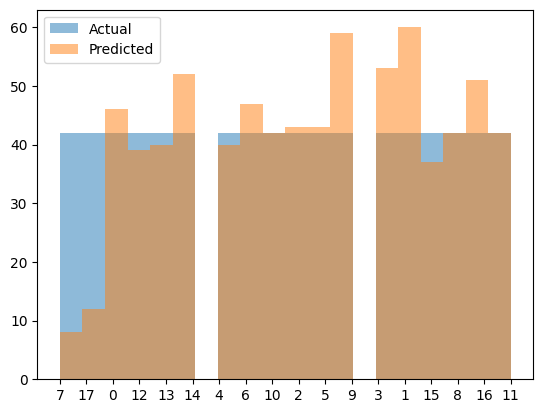

In [ ]:
# plot histogram of actual values
plt.hist(y_balanced, bins=20, alpha=0.5, label='Actual')

# plot histogram of predicted values
plt.hist(knn.predict(X_balanced), bins=20, alpha=0.5, label='Predicted')

plt.legend()
plt.show()

In [ ]:
# define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}


# perform grid search cross-validation to find the best hyperparameters
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

# print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters:", grid.best_params_)
print("Best Mean Cross-validated Score:", grid.best_score_)

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best Mean Cross-validated Score: 0.9073315363881402


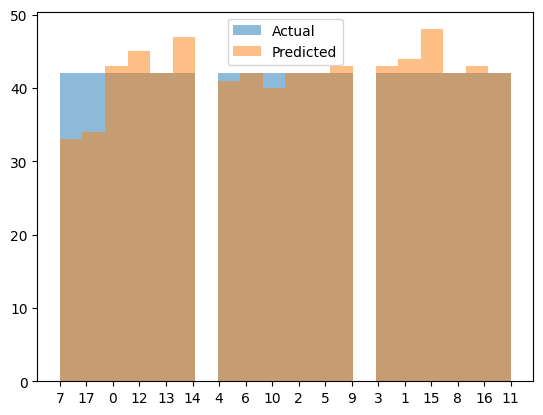

In [ ]:
# plot histogram of actual values
plt.hist(y_balanced, bins=20, alpha=0.5, label='Actual')

# plot histogram of predicted values
plt.hist(grid.predict(X_balanced), bins=20, alpha=0.5, label='Predicted')

plt.legend()
plt.show()